In [2]:
#!pip install plotly

In [3]:
import pandas as pd
pd.set_option("display.max_columns",None)  ## To fetch all the attributes
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px  ##For dynamic visualisation


In [4]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Airbnb Capstone\\listings-airbnb-can.csv")

In [5]:
df.head()

id                                               name    host_id  \
0  44419781.0                     Studio Suite | Business Travel  348430184   
1  44429201.0   Beautiful & Cozy One Bedroom Condo In Yorkville!  354808129   
2  44429908.0  Stylish Roncesvalles Private Suite w/ Tech Extras   37415518   
3  44430872.0                    Newly Renovated 2nd floor Suite  358865808   
4  44433011.0  Spacious, Cozy 1 Bedroom Loft in downtown Toronto   20355052   

  host_name  neighbourhood_group       neighbourhood  latitude  longitude  \
0    Avalon                  NaN               Annex  43.67127  -79.39461   
1      Erin                  NaN               Annex  43.67142  -79.39487   
2   Anthony                  NaN        Roncesvalles  43.64055  -79.43939   
3       Joe                  NaN  Weston-Pellam Park  43.66801  -79.45752   
4    Turgut                  NaN         Regent Park  43.65806  -79.35499   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    155               2                 34  30-01-2022   
1  Entire home/apt    120              30                  3  31-10-2021   
2  Entire home/apt     95               3                 37  04-02-2022   
3  Entire home/apt    115               3                  4  02-01-2022   
4  Entire home/apt    160              28                  0         NaN   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.86                              33               308   
1               0.17                               7                35   
2               2.78                               1               117   
3               1.08                               1                79   
4                NaN                               1                29   

   number_of_reviews_ltm          license  
0                     21  STR-2011-HPXRVK  
1                      2              NaN  
2                     35  STR-2012-FVZBHD  
3                      4  STR-2110-FXJVHD  
4                      0              NaN

In [6]:
df.shape
## data belongs from 11-Aug-2011 to 04-Dec-2021
## based on the data set , four columns are categories and 1 is date and 13 are numeric
## category - name , host name ,neighbourhood,  room type
## date - last review 
## rest are numeric

(15418, 18)

In [7]:
df.info()  ##ltm is last 12 months

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15418 non-null  float64
 1   name                            15416 non-null  object 
 2   host_id                         15418 non-null  int64  
 3   host_name                       15412 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15418 non-null  object 
 6   latitude                        15418 non-null  float64
 7   longitude                       15418 non-null  float64
 8   room_type                       15418 non-null  object 
 9   price                           15418 non-null  int64  
 10  minimum_nights                  15418 non-null  int64  
 11  number_of_reviews               15418 non-null  int64  
 12  last_review                     

In [8]:
#A = df.describe().T
#A.to_csv('Airbnb Dictionary.csv',index = True)  ##to get the five number summary in the csv format

In [9]:
#B = df1.describe().T
#B.to_csv('Airbnb Dictionary2.csv',index = True)

In [11]:
df.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             6
neighbourhood_group               15418
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3437
reviews_per_month                  3437
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10075
dtype: int64

In [11]:
df.room_type = df.room_type.astype("category")

In [12]:
df.last_review = pd.to_datetime(df.last_review)

In [13]:
df.dtypes

id                                       float64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

In [14]:
# droppoing the extra columns which has no use in the dataset, in this axis=1 represents the column and inplace= True
# is used to show the changes in the original dataset
df.drop(['neighbourhood_group','license','last_review'], axis=1, inplace=True)

In [15]:
df.head()

id                                               name    host_id  \
0  44419781.0                     Studio Suite | Business Travel  348430184   
1  44429201.0   Beautiful & Cozy One Bedroom Condo In Yorkville!  354808129   
2  44429908.0  Stylish Roncesvalles Private Suite w/ Tech Extras   37415518   
3  44430872.0                    Newly Renovated 2nd floor Suite  358865808   
4  44433011.0  Spacious, Cozy 1 Bedroom Loft in downtown Toronto   20355052   

  host_name       neighbourhood  latitude  longitude        room_type  price  \
0    Avalon               Annex  43.67127  -79.39461  Entire home/apt    155   
1      Erin               Annex  43.67142  -79.39487  Entire home/apt    120   
2   Anthony        Roncesvalles  43.64055  -79.43939  Entire home/apt     95   
3       Joe  Weston-Pellam Park  43.66801  -79.45752  Entire home/apt    115   
4    Turgut         Regent Park  43.65806  -79.35499  Entire home/apt    160   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               2                 34               1.86   
1              30                  3               0.17   
2               3                 37               2.78   
3               3                  4               1.08   
4              28                  0                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                              33               308                     21  
1                               7                35                      2  
2                               1               117                     35  
3                               1                79                      4  
4                               1                29                      0

In [16]:
df['room_type'].value_counts()

Entire home/apt    10277
Private room        4953
Shared room          171
Hotel room            17
Name: room_type, dtype: int64

In [17]:
# to_frame will convert the value count for each room in data frame
df['room_type'].value_counts().to_frame()

room_type
Entire home/apt      10277
Private room          4953
Shared room            171
Hotel room              17

<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

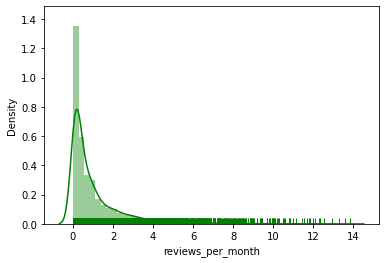

In [18]:
sns.distplot(df['reviews_per_month'],rug=True, color='green')  ## as attribute is right skewed, rug=True shows all the density values which are on the x-axis(reviews_per_month).

In [19]:
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            6
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 3437
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [20]:
df.fillna({'name':'None','host_name':'None'}, inplace=True)

In [21]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [22]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15418 entries, 0 to 15417
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              15418 non-null  float64 
 1   name                            15418 non-null  object  
 2   host_id                         15418 non-null  int64   
 3   host_name                       15418 non-null  object  
 4   neighbourhood                   15418 non-null  object  
 5   latitude                        15418 non-null  float64 
 6   longitude                       15418 non-null  float64 
 7   room_type                       15418 non-null  category
 8   price                           15418 non-null  int64   
 9   minimum_nights                  15418 non-null  int64   
 10  number_of_reviews               15418 non-null  int64   
 11  reviews_per_month               15418 non-null  float64 
 12  calculated_host_li

In [15]:
round(df.describe().T,2)

count          mean           std      min  \
id                              15418.0  2.492910e+16  1.153922e+17  1419.00   
host_id                         15418.0  1.288373e+08  1.262590e+08  1565.00   
neighbourhood_group                 0.0           NaN           NaN      NaN   
latitude                        15418.0  4.368000e+01  5.000000e-02    43.59   
longitude                       15418.0 -7.940000e+01  7.000000e-02   -79.63   
price                           15418.0  1.590400e+02  3.700900e+02     0.00   
minimum_nights                  15418.0  2.576000e+01  3.859000e+01     1.00   
number_of_reviews               15418.0  2.600000e+01  5.330000e+01     0.00   
reviews_per_month               11981.0  1.060000e+00  1.490000e+00     0.01   
calculated_host_listings_count  15418.0  5.560000e+00  1.445000e+01     1.00   
availability_365                15418.0  1.327500e+02  1.337100e+02     0.00   
number_of_reviews_ltm           15418.0  4.830000e+00  1.246000e+01     0.00   

                                        25%          50%           75%  \
id                              18925773.75  33777334.00  4.660926e+07   
host_id                         22378000.50  82723935.50  2.140302e+08   
neighbourhood_group                     NaN          NaN           NaN   
latitude                              43.65        43.66  4.370000e+01   
longitude                            -79.43       -79.40 -7.938000e+01   
price                                 69.00       106.00  1.690000e+02   
minimum_nights                         4.00        28.00  2.800000e+01   
number_of_reviews                      1.00         5.00  2.600000e+01   
reviews_per_month                      0.15         0.48  1.320000e+00   
calculated_host_listings_count         1.00         1.00  4.000000e+00   
availability_365                       0.00        88.00  2.580000e+02   
number_of_reviews_ltm                  0.00         0.00  3.000000e+00   

                                         max  
id                              5.774370e+17  
host_id                         4.478068e+08  
neighbourhood_group                      NaN  
latitude                        4.384000e+01  
longitude                      -7.912000e+01  
price                           1.300000e+04  
minimum_nights                  1.125000e+03  
number_of_reviews               8.280000e+02  
reviews_per_month               1.384000e+01  
calculated_host_listings_count  1.330000e+02  
availability_365                3.650000e+02  
number_of_reviews_ltm           1.700000e+02

In [25]:
df.describe(include =[np.object])

name host_name  \
count                                            15418     15418   
unique                                           15099      4783   
top     Downtown Toronto Little Italy Trinity Bellwood  Sky View   
freq                                                 7       133   

                            neighbourhood  
count                               15418  
unique                                140  
top     Waterfront Communities-The Island  
freq                                 2721

In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [27]:
from plotly.subplots import make_subplots
#import plotly.graph_objects as go


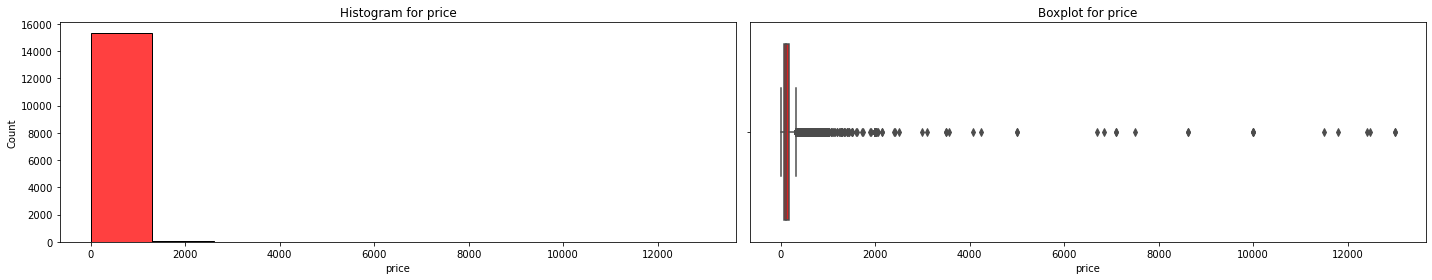

In [28]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['price'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['price'],color='red')

axes[0].set_title("Histogram for price")
axes[1].set_title("Boxplot for price")
plt.tight_layout()
plt.show()

In [29]:
median_price=np.median(df["price"])
print(median_price)

Q1_price= df.price.quantile(0.25)
print(Q1_price)

Q3_price= df.price.quantile(0.75)
print(Q3_price)

106.0
69.0
169.0


In [30]:
IQR_price=Q3_price-Q1_price
print('IQR for Price :',IQR_price)
upperBound_price=Q3_price+1.5*IQR_price
lowerBound_price=Q1_price-1.5*IQR_price
print('Upper Bound for Price :',upperBound_price)
print('Lower Bound for Price :',lowerBound_price)

IQR for Price : 100.0
Upper Bound for Price : 319.0
Lower Bound for Price : -81.0


In [31]:
 df.loc[df["price"]>=upperBound_price,"price"] = upperBound_price

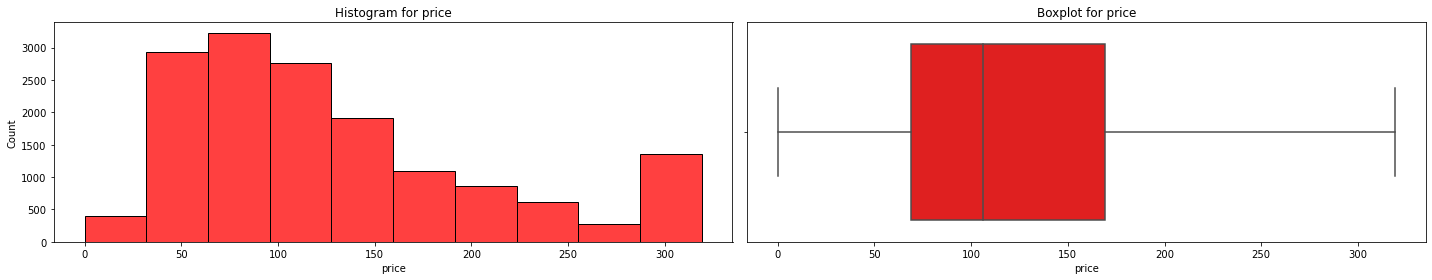

In [32]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['price'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['price'],color='red')

axes[0].set_title("Histogram for price")
axes[1].set_title("Boxplot for price")
plt.tight_layout()
plt.show()

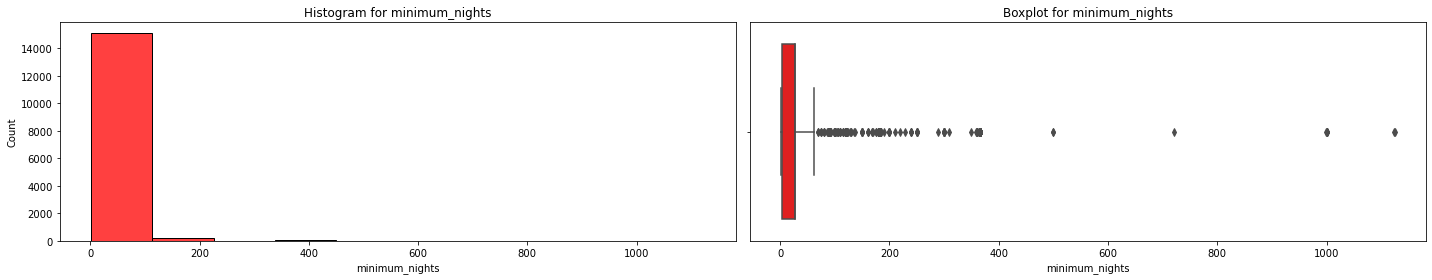

In [33]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['minimum_nights'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['minimum_nights'],color='red')

axes[0].set_title("Histogram for minimum_nights")
axes[1].set_title("Boxplot for minimum_nights")
plt.tight_layout()
plt.show()

In [34]:
median_minimum_nights=np.median(df["minimum_nights"])
print(median_minimum_nights)

Q1_minimum_nights= df.minimum_nights.quantile(0.25)
print(Q1_minimum_nights)

Q3_minimum_nights= df.minimum_nights.quantile(0.75)
print(Q3_minimum_nights)

IQR_minimum_nights=Q3_minimum_nights-Q1_minimum_nights
print('IQR for minimum_nights :',IQR_minimum_nights)
upperBound_minimum_nights=Q3_minimum_nights+1.5*IQR_minimum_nights
lowerBound_minimum_nights=Q1_minimum_nights-1.5*IQR_minimum_nights
print('Upper Bound for minimum_nights :',upperBound_minimum_nights)
print('Lower Bound for minimum_nights :',lowerBound_minimum_nights)

28.0
4.0
28.0
IQR for minimum_nights : 24.0
Upper Bound for minimum_nights : 64.0
Lower Bound for minimum_nights : -32.0


In [35]:
 df.loc[df["minimum_nights"]>=upperBound_minimum_nights,"minimum_nights"] = upperBound_minimum_nights

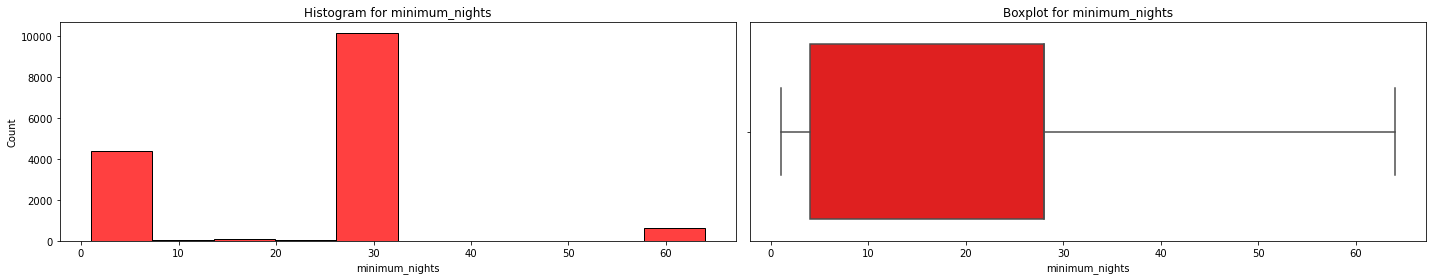

In [36]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['minimum_nights'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['minimum_nights'],color='red')

axes[0].set_title("Histogram for minimum_nights")
axes[1].set_title("Boxplot for minimum_nights")
plt.tight_layout()
plt.show()

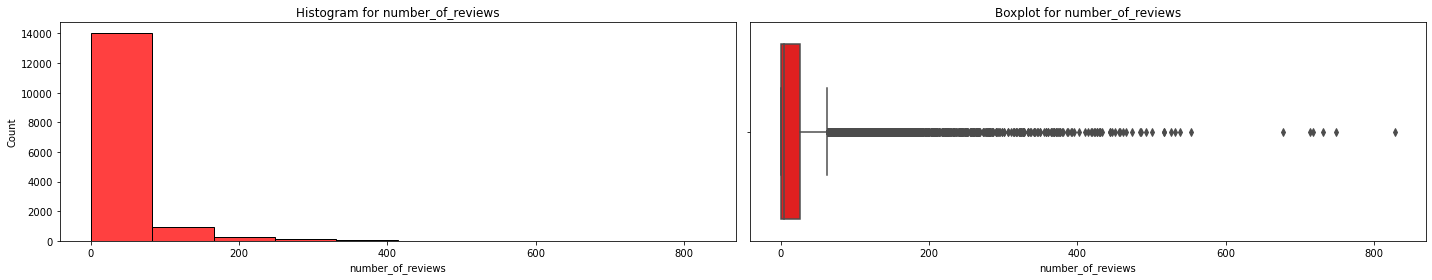

In [37]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['number_of_reviews'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['number_of_reviews'],color='red')

axes[0].set_title("Histogram for number_of_reviews")
axes[1].set_title("Boxplot for number_of_reviews")
plt.tight_layout()
plt.show()

In [38]:
median_number_of_reviews=np.median(df["number_of_reviews"])
print(median_number_of_reviews)

Q1_number_of_reviews= df.number_of_reviews.quantile(0.25)
print(Q1_number_of_reviews)

Q3_number_of_reviews= df.number_of_reviews.quantile(0.75)
print(Q3_number_of_reviews)

IQR_number_of_reviews=Q3_number_of_reviews-Q1_number_of_reviews
print('IQR for number_of_reviews :',IQR_number_of_reviews)
upperBound_number_of_reviews=Q3_number_of_reviews+1.5*IQR_number_of_reviews
lowerBound_number_of_reviews=Q1_number_of_reviews-1.5*IQR_number_of_reviews
print('Upper Bound for number_of_reviews:',upperBound_number_of_reviews)
print('Lower Bound for number_of_reviews :',lowerBound_number_of_reviews)

5.0
1.0
26.0
IQR for number_of_reviews : 25.0
Upper Bound for number_of_reviews: 63.5
Lower Bound for number_of_reviews : -36.5


In [39]:
 df.loc[df["number_of_reviews"]>=upperBound_number_of_reviews,"number_of_reviews"] = upperBound_number_of_reviews

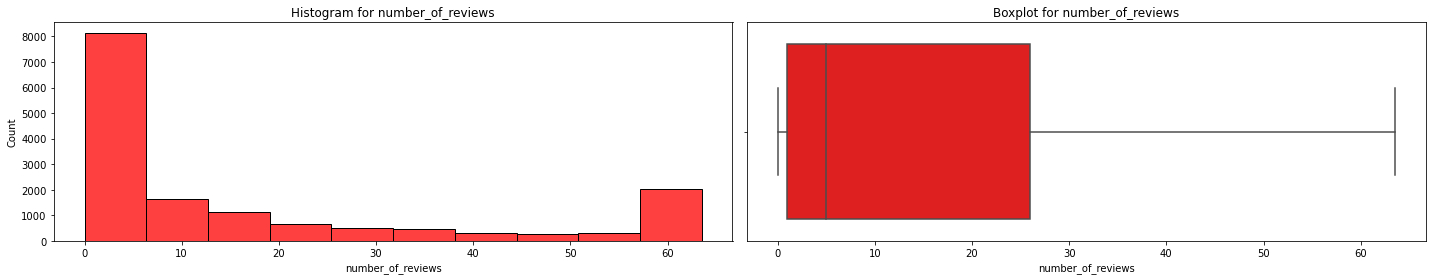

In [40]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['number_of_reviews'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['number_of_reviews'],color='red')

axes[0].set_title("Histogram for number_of_reviews")
axes[1].set_title("Boxplot for number_of_reviews")
plt.tight_layout()
plt.show()

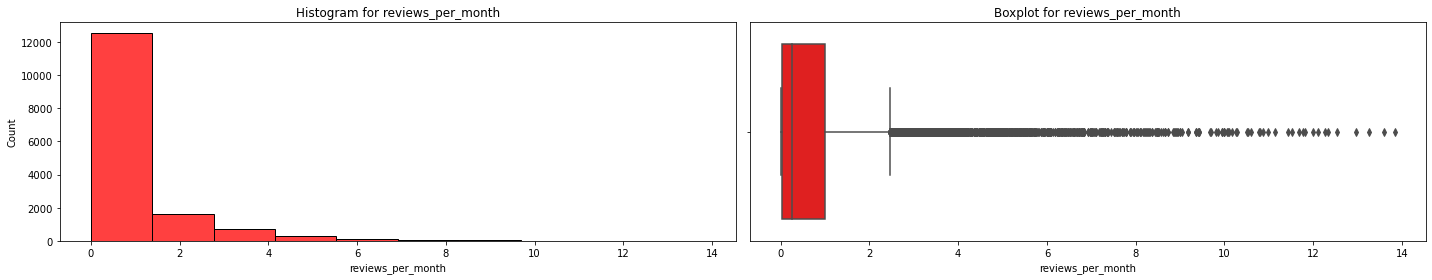

In [41]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['reviews_per_month'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['reviews_per_month'],color='red')

axes[0].set_title("Histogram for reviews_per_month")
axes[1].set_title("Boxplot for reviews_per_month")
plt.tight_layout()
plt.show()

In [42]:
median_reviews_per_month=np.median(df["reviews_per_month"])
print(median_reviews_per_month)

Q1_reviews_per_month= df.reviews_per_month.quantile(0.25)
print(Q1_reviews_per_month)

Q3_reviews_per_month= df.reviews_per_month.quantile(0.75)
print(Q3_reviews_per_month)

IQR_reviews_per_month=Q3_reviews_per_month-Q1_reviews_per_month
print('IQR for reviews_per_month :',IQR_reviews_per_month)
upperBound_reviews_per_month=Q3_reviews_per_month+1.5*IQR_reviews_per_month
lowerBound_reviews_per_month=Q1_reviews_per_month-1.5*IQR_reviews_per_month
print('Upper Bound for reviews_per_month:',upperBound_reviews_per_month)
print('Lower Bound for reviews_per_month :',lowerBound_reviews_per_month)

0.26
0.02
1.0
IQR for reviews_per_month : 0.98
Upper Bound for reviews_per_month: 2.4699999999999998
Lower Bound for reviews_per_month : -1.45


In [43]:
 df.loc[df["reviews_per_month"]>=upperBound_reviews_per_month,"reviews_per_month"] = upperBound_reviews_per_month

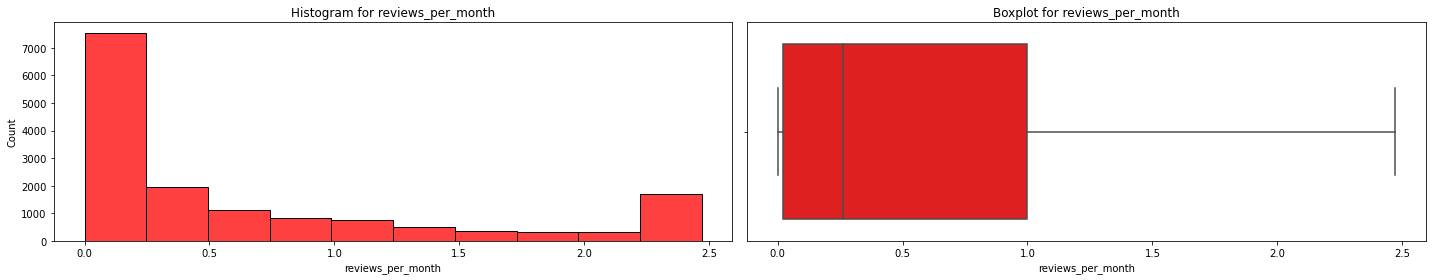

In [44]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['reviews_per_month'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['reviews_per_month'],color='red')

axes[0].set_title("Histogram for reviews_per_month")
axes[1].set_title("Boxplot for reviews_per_month")
plt.tight_layout()
plt.show()

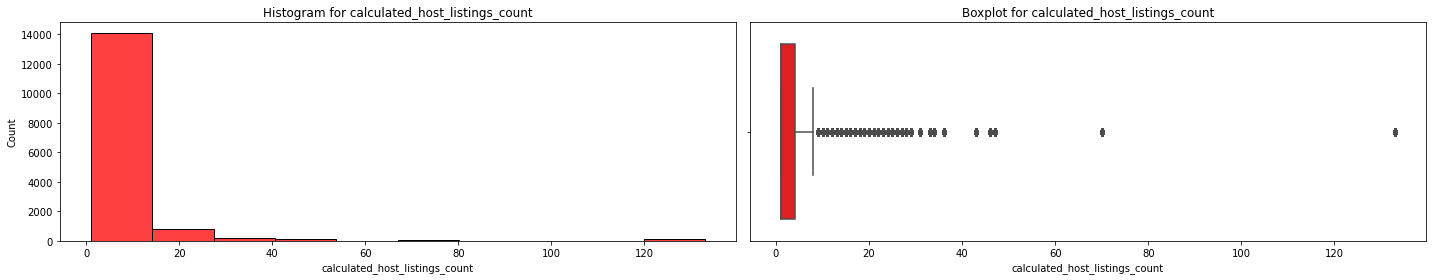

In [45]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['calculated_host_listings_count'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['calculated_host_listings_count'],color='red')

axes[0].set_title("Histogram for calculated_host_listings_count")
axes[1].set_title("Boxplot for calculated_host_listings_count")
plt.tight_layout()
plt.show()

In [46]:
median_calculated_host_listings_count=np.median(df["calculated_host_listings_count"])
print(median_calculated_host_listings_count)

Q1_calculated_host_listings_count= df.calculated_host_listings_count.quantile(0.25)
print(Q1_calculated_host_listings_count)

Q3_calculated_host_listings_count= df.calculated_host_listings_count.quantile(0.75)
print(Q3_calculated_host_listings_count)

IQR_calculated_host_listings_count=Q3_calculated_host_listings_count-Q1_calculated_host_listings_count
print('IQR for calculated_host_listings_count :',IQR_calculated_host_listings_count)
upperBound_calculated_host_listings_count=Q3_calculated_host_listings_count+1.5*IQR_calculated_host_listings_count
lowerBound_calculated_host_listings_count=Q1_calculated_host_listings_count-1.5*IQR_calculated_host_listings_count
print('Upper Bound for calculated_host_listings_count:',upperBound_calculated_host_listings_count)
print('Lower Bound for calculated_host_listings_count :',lowerBound_calculated_host_listings_count)

1.0
1.0
4.0
IQR for calculated_host_listings_count : 3.0
Upper Bound for calculated_host_listings_count: 8.5
Lower Bound for calculated_host_listings_count : -3.5


In [47]:
 df.loc[df["calculated_host_listings_count"]>=upperBound_calculated_host_listings_count,"calculated_host_listings_count"] = upperBound_calculated_host_listings_count

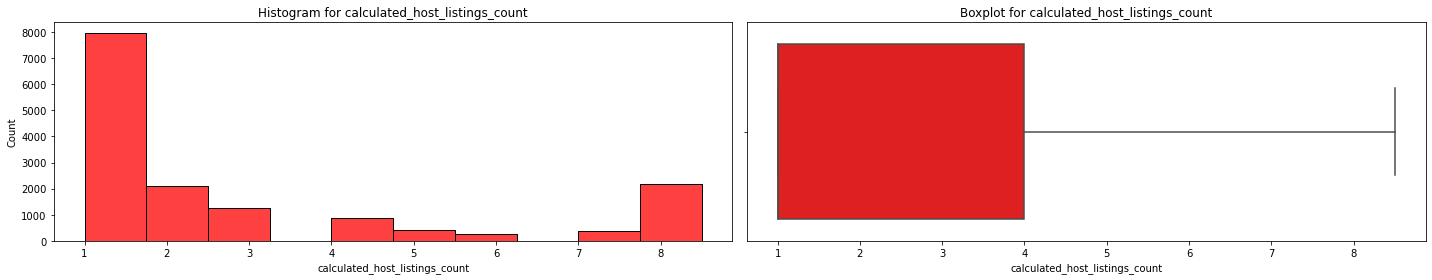

In [48]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['calculated_host_listings_count'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['calculated_host_listings_count'],color='red')

axes[0].set_title("Histogram for calculated_host_listings_count")
axes[1].set_title("Boxplot for calculated_host_listings_count")
plt.tight_layout()
plt.show()

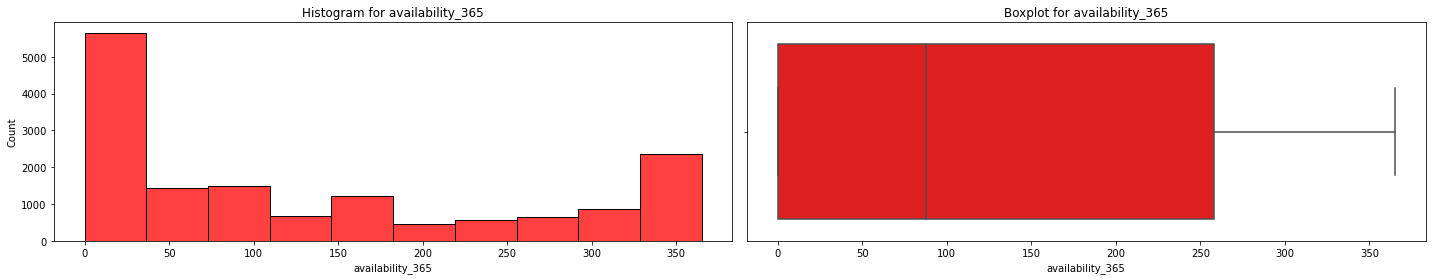

In [49]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['availability_365'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['availability_365'],color='red')

axes[0].set_title("Histogram for availability_365")
axes[1].set_title("Boxplot for availability_365")
plt.tight_layout()
plt.show()

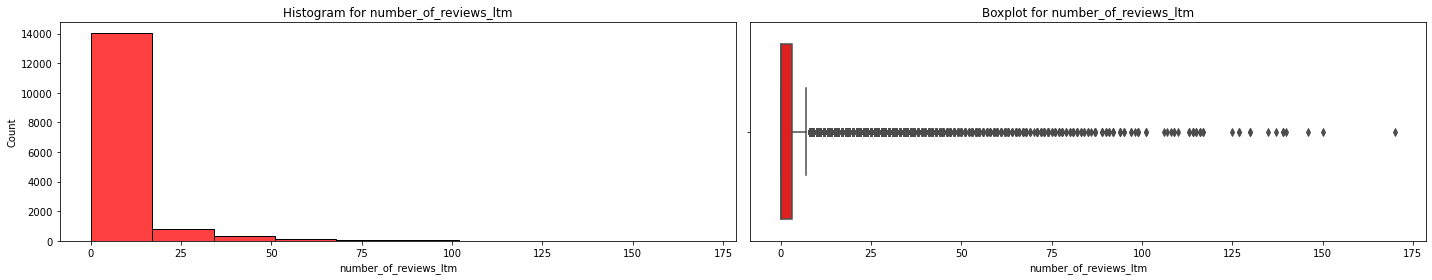

In [50]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['number_of_reviews_ltm'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['number_of_reviews_ltm'],color='red')

axes[0].set_title("Histogram for number_of_reviews_ltm")
axes[1].set_title("Boxplot for number_of_reviews_ltm")
plt.tight_layout()
plt.show()

In [51]:
median_number_of_reviews_ltm=np.median(df["number_of_reviews_ltm"])
print(median_number_of_reviews_ltm)

Q1_number_of_reviews_ltm= df.number_of_reviews_ltm.quantile(0.25)
print(Q1_number_of_reviews_ltm)

Q3_number_of_reviews_ltm= df.number_of_reviews_ltm.quantile(0.75)
print(Q3_number_of_reviews_ltm)

IQR_number_of_reviews_ltm=Q3_number_of_reviews_ltm-Q1_number_of_reviews_ltm
print('IQR for number_of_reviews_ltm :',IQR_number_of_reviews_ltm)
upperBound_number_of_reviews_ltm=Q3_number_of_reviews_ltm+1.5*IQR_number_of_reviews_ltm
lowerBound_number_of_reviews_ltm=Q1_number_of_reviews_ltm-1.5*IQR_number_of_reviews_ltm
print('Upper Bound for number_of_reviews_ltm:',upperBound_number_of_reviews_ltm)
print('Lower Bound for number_of_reviews_ltm:',lowerBound_number_of_reviews_ltm)

0.0
0.0
3.0
IQR for number_of_reviews_ltm : 3.0
Upper Bound for number_of_reviews_ltm: 7.5
Lower Bound for number_of_reviews_ltm: -4.5


In [52]:
 df.loc[df["number_of_reviews_ltm"]>=upperBound_number_of_reviews_ltm,"number_of_reviews_ltm"] = upperBound_number_of_reviews_ltm

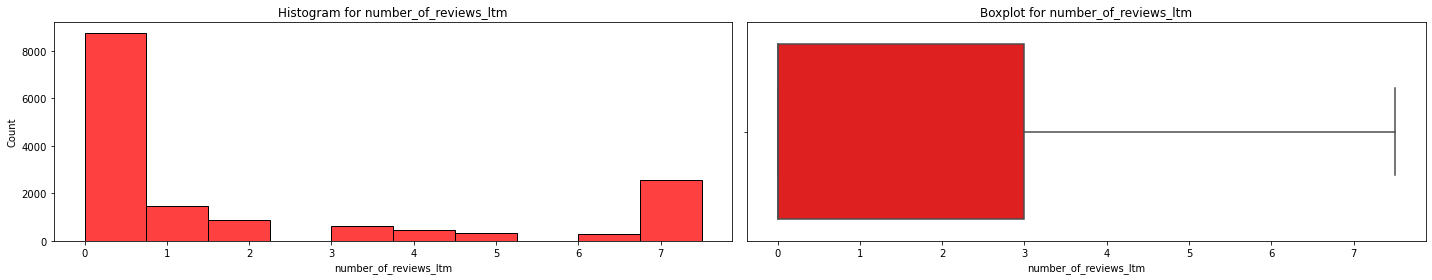

In [53]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.histplot(df['number_of_reviews_ltm'],bins=10,ax=axes[0],color='red')
sns.boxplot(df['number_of_reviews_ltm'],color='red')

axes[0].set_title("Histogram for number_of_reviews_ltm")
axes[1].set_title("Boxplot for number_of_reviews_ltm")
plt.tight_layout()
plt.show()

In [54]:
df.shape

(15418, 15)

In [55]:
#df.to_csv('new_cleaned.csv')

In [56]:
df["room_type"].value_counts()

Entire home/apt    10277
Private room        4953
Shared room          171
Hotel room            17
Name: room_type, dtype: int64

In [57]:
df["room_type"].value_counts()[3]

17

<AxesSubplot:>

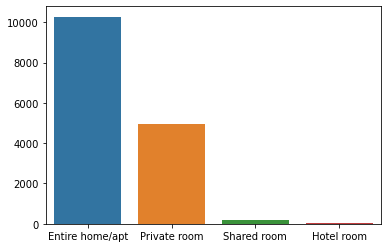

In [58]:
x=['Entire home/apt','Private room','Shared room','Hotel room']
y=[df["room_type"].value_counts()[0],df["room_type"].value_counts()[1],df["room_type"].value_counts()[2],df["room_type"].value_counts()[3]]
sns.barplot(x, y)


#### As per the above graph it can be seen that most of the airbnb hotel types are entire home/apartments, while the least famous are shared rooms and hotel rooms which are lented by airbnb

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of price based on room-type')

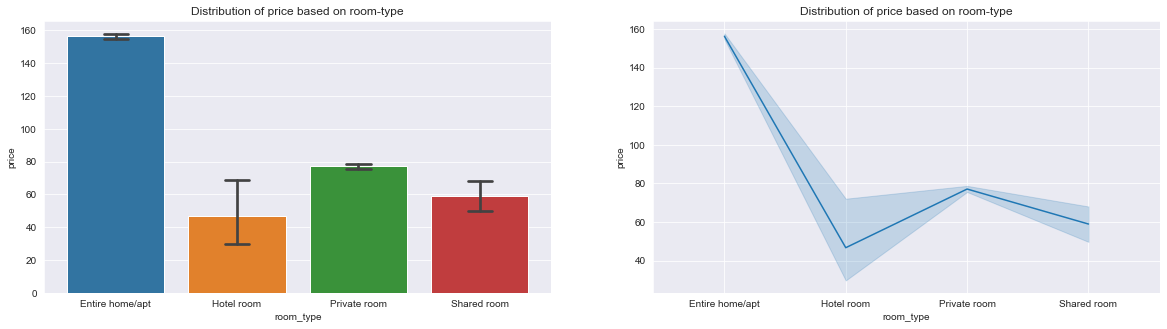

In [59]:
sns.set_style("darkgrid")
figure, axes = plt.subplots(1,2, sharex=True, figsize=(20,5))  ##sharex=True means x-axis will be shared for both the graphs
sns.barplot(x='room_type',y='price',data=df,capsize=.2,ax=axes[0])
sns.lineplot(x='room_type',y='price',data=df,ax=axes[1])
axes[0].set_title("Distribution of price based on room-type")
axes[1].set_title("Distribution of price based on room-type")



In [60]:
a=df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20]
b=a.to_dict()

In [61]:
a

neighbourhood
Bridle Path-Sunnybrook-York Mills    231.083333
Waterfront Communities-The Island    177.814774
Rosedale-Moore Park                  165.557143
Niagara                              161.194030
Princess-Rosethorn                   160.411765
Lawrence Park South                  159.177778
Casa Loma                            158.509091
Beechborough-Greenbrook              156.687500
Forest Hill South                    156.120000
Bay Street Corridor                  156.119540
The Beaches                          153.468531
South Riverdale                      150.181185
Annex                                149.733333
Yonge-Eglinton                       147.438356
Runnymede-Bloor West Village         147.387097
Moss Park                            146.659280
Rustic                               145.400000
Kingsway South                       145.300000
Leaside-Bennington                   141.380000
Broadview North                      139.729730
Name: price, dtype: float6

In [62]:
b
line_chart_label=b.keys()
line_chart_label

dict_keys(['Bridle Path-Sunnybrook-York Mills', 'Waterfront Communities-The Island', 'Rosedale-Moore Park', 'Niagara', 'Princess-Rosethorn', 'Lawrence Park South', 'Casa Loma', 'Beechborough-Greenbrook', 'Forest Hill South', 'Bay Street Corridor', 'The Beaches', 'South Riverdale', 'Annex', 'Yonge-Eglinton', 'Runnymede-Bloor West Village', 'Moss Park', 'Rustic', 'Kingsway South', 'Leaside-Bennington', 'Broadview North'])

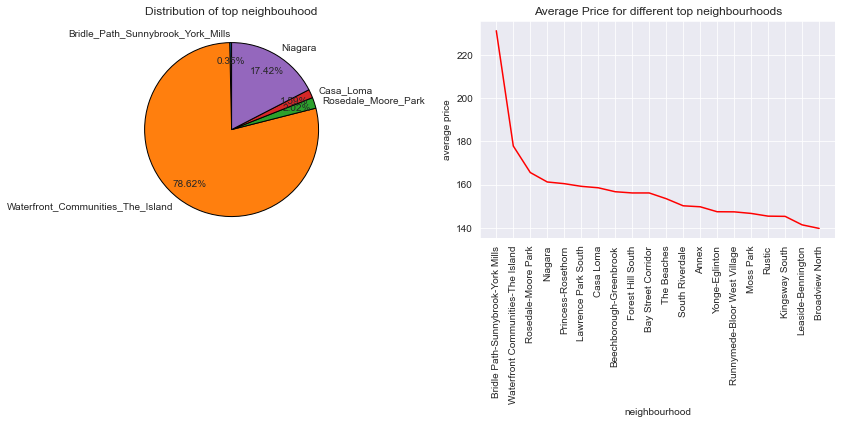

In [88]:
fig,axes = plt.subplots(1,2,figsize=(14,4))


Bridle_Path_Sunnybrook_York_Mills=df[df['neighbourhood']=='Bridle Path-Sunnybrook-York Mills'].shape[0]
Waterfront_Communities_The_Island=df[df['neighbourhood']=='Waterfront Communities-The Island'].shape[0]
Rosedale_Moore_Park=df[df['neighbourhood']=='Rosedale-Moore Park'].shape[0]
Casa_Loma=df[df['neighbourhood']=='Casa Loma'].shape[0]
Niagara=df[df['neighbourhood']=='Niagara'].shape[0]

slices=[Bridle_Path_Sunnybrook_York_Mills,Waterfront_Communities_The_Island,Rosedale_Moore_Park,Casa_Loma,Niagara]
labels=['Bridle_Path_Sunnybrook_York_Mills','Waterfront_Communities_The_Island','Rosedale_Moore_Park','Casa_Loma','Niagara']


axes[0].pie(slices,labels=labels,autopct='%1.2f%%',startangle=90,wedgeprops={'edgecolor':'black'},radius=1,pctdistance=0.79)
axes[0].set_title("Distribution of top neighbouhood")

axes[1].plot(a,color='red')
#labels=['Bridle_Path_Sunnybrook_York_Mills','Waterfront_Communities_The_Island','Rosedale_Moore_Park','Casa_Loma','Niagara']

axes[1].set_xlabel('neighbourhood')
axes[1].set_ylabel('average price')
axes[1].set_title('Average Price for different top neighbourhoods')
axes[1].set_xticklabels(line_chart_label,rotation=90)


plt.show()

In [64]:
## top 20 highest reviews
review_count_max=df.groupby('name')['number_of_reviews'].sum().sort_values(ascending=False)[:15]
review_count_max=review_count_max.to_dict()
review_count_max



{'Private Bedroom in Toronto North York #1': 127.0,
 'DWTN Hotel Style Apt up to 4 people': 127.0,
 'Studio Apartment': 125.5,
 'Home away from home': 123.5,
 'Luxury Studio + Balcony in the Heart of Downtown': 111.5,
 'Great location': 107.5,
 'Chic & Modern 1-bedroom Private Apartment INTHE6IX': 106.5,
 'Above 50th Flr Luxury Condo @Heart of Downtown TO!': 95.5,
 'Luxury Downtown Toronto Suite': 88.5,
 'Fantastic Room in the Entertainment District': 80.0,
 'Toronto home with a view': 76.5,
 '2 BDRM + Sofabed - Ent. District, MTCC': 71.5,
 'Minutes fr Eaton Centre & Dundas Sq': 69.5,
 'Spacious 2 Bedroom Apartment': 68.5,
 '1BR 1BA for 5ppl with Balcony': 68.0}

In [65]:
#creating hit name list for these keys
review_count_max.keys()


dict_keys(['Private Bedroom in Toronto North York #1', 'DWTN Hotel Style Apt up to 4 people', 'Studio Apartment', 'Home away from home', 'Luxury Studio + Balcony in the Heart of Downtown', 'Great location', 'Chic & Modern 1-bedroom Private Apartment INTHE6IX', 'Above 50th Flr Luxury Condo @Heart of Downtown TO!', 'Luxury Downtown Toronto Suite', 'Fantastic Room in the Entertainment District', 'Toronto home with a view', '2 BDRM + Sofabed - Ent. District, MTCC', 'Minutes fr Eaton Centre & Dundas Sq', 'Spacious 2 Bedroom Apartment', '1BR 1BA for 5ppl with Balcony'])

In [66]:
#creating hit review list for these values
review_count_max.values()


dict_values([127.0, 127.0, 125.5, 123.5, 111.5, 107.5, 106.5, 95.5, 88.5, 80.0, 76.5, 71.5, 69.5, 68.5, 68.0])

In [67]:
# hit_names and hit_review extracted using review_count_max by converting to dictionary and taking values of keys and values
hit_names=['Private Bedroom in Toronto North York #1', 'DWTN Hotel Style Apt up to 4 people', 'Home away from home', 'Luxury Studio + Balcony in the Heart of Downtown', 'Studio Apartment', 'Great location', 'Chic & Modern 1-bedroom Private Apartment INTHE6IX', 'Luxury Downtown Toronto Suite', 'Above 50th Flr Luxury Condo @Heart of Downtown TO!', '2 BDRM + Sofabed - Ent. District, MTCC', 'Spacious 2 Bedroom Apartment', 'Minutes fr Eaton Centre & Dundas Sq', 'Suite in Downtown with Self Check-in', '40th+ floor perfect view of CN Tower and the Lake', 'Beautiful Condo in the Heart of Downtown Toronto']
hit_review_values=[176, 176, 148, 136, 135, 130, 114, 113, 103, 96, 93, 91, 90, 90, 89]

In [68]:
## mean of all the names
name_price_mean=df.groupby('name')['price'].mean()
name_price_mean=name_price_mean.to_dict()
name_price_mean

{'! BRIGHT COZY ROOM CLOSE TO DAVISVILLE SUBWAY': 34.0,
 '! PRIVATE COZY ROOM IN THE ATTIC GREAT AREA,SUBWAY': 32.0,
 '!! Isolation Suite in Downtown Toronto !!': 98.0,
 '!! One Bedroom in Entertainment District!!': 110.0,
 '!BIG BRIGHT ROOM W. KITCHENETTE&BALCONY GREAT AREA': 34.0,
 '!NEW 3 bedrm flat kitch bath wifi laundry study.': 85.0,
 '!NEW entire 1 bedrm suite wifi+laundry+kitch+bath': 46.0,
 '!New 1 bedroom  flat+kitchen+wifi+bathroom+laundry': 46.0,
 '" Bright, modern home in trendy Bloordale"': 150.0,
 '" Luxury corner 3Brm+ 2Bath *Free Parking* View "': 150.0,
 '"1 Bedroom with gorgeous city view!"': 80.0,
 '"B" at the center of everything Toronto': 100.0,
 '"Beautiful 1 bedroom apartment close to downtown!"': 99.0,
 '"Cozy Comfort Apartment with balcony & Parking"': 95.0,
 '"Cozy room for one" with private bathroom!': 48.0,
 '"Ent. District/Waterfront + 1 BDRM + 1 BA+ Parking': 135.0,
 '"Ent. District/Waterfront + 1 BDRM + 1 BA+ parking': 135.0,
 '"Entire Basement Apt Sepa

In [69]:
## extracting mean price for values present in hit_names and hit_review_values, to use in analysis
hit_name_price=[]
for values in hit_names:
    if values in name_price_mean:
       # print(values, name_price_mean[values])
        hit_name_price.append(name_price_mean[values])
    else:
        pass
hit_name_price

[51.0,
 103.0,
 84.66666666666667,
 114.0,
 107.5,
 87.5,
 146.0,
 146.5,
 154.0,
 200.0,
 105.0,
 247.0,
 135.0,
 191.5,
 95.0]

In [70]:
## extracting monthly review dats for top 20 highest reviews
review_count_monthly=df.groupby('name')['reviews_per_month'].sum().sort_values(ascending=False)
review_count_monthly=review_count_monthly.to_dict()

hit_name_monthly_review=[]
for values in hit_names:
    if values in review_count_monthly:
        #print(values, review_count_monthly[values])
        hit_name_monthly_review.append(review_count_monthly[values])
    else:
        pass
hit_name_monthly_review

[4.9399999999999995,
 4.9399999999999995,
 4.86,
 4.9399999999999995,
 1.57,
 1.98,
 2.0700000000000003,
 4.21,
 4.859999999999999,
 3.6399999999999997,
 1.77,
 2.69,
 2.61,
 2.7399999999999998,
 3.4699999999999998]

In [71]:
## extracting last twelve months review dats for top 20 highest reviews
review_count_last_12month=df.groupby('name')['number_of_reviews_ltm'].sum().sort_values(ascending=False)
review_count_last_12month=review_count_last_12month.to_dict()

hit_name_last_12month_review=[]
for values in hit_names:
    if values in review_count_last_12month:
        #print(values, review_count_last_12month[values])
        hit_name_last_12month_review.append(review_count_last_12month[values])
    else:
        pass
hit_name_last_12month_review

[15.0,
 0.0,
 15.0,
 7.5,
 4.0,
 1.0,
 15.0,
 13.5,
 12.5,
 15.0,
 0.0,
 7.5,
 0.0,
 9.5,
 8.5]

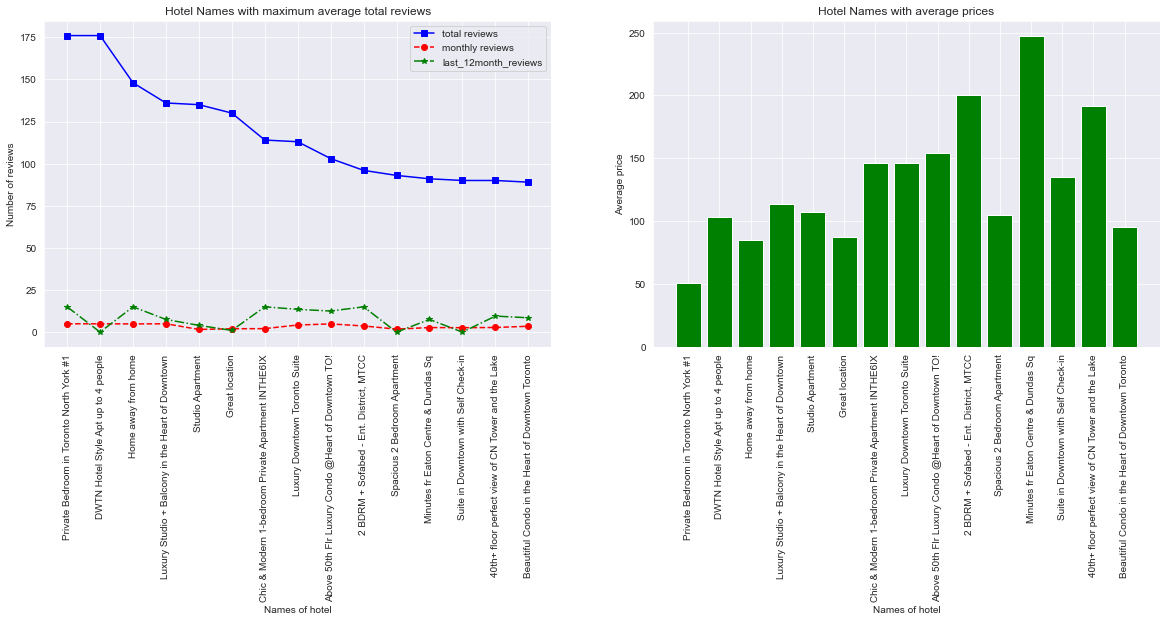

In [72]:
fig,axes = plt.subplots(1,2,figsize=(20,6))

axes[0].plot(hit_names, hit_review_values, marker='s', c='b', ls='-')
axes[0].plot(hit_names, hit_name_monthly_review, marker='o', c='r', ls='--')
axes[0].plot(hit_names, hit_name_last_12month_review, marker='*', c='g', ls='-.')


axes[1].bar(hit_names, hit_name_price, color='green')

axes[0].set_xlabel('Names of hotel')
axes[0].set_ylabel('Number of reviews')
axes[1].set_xlabel('Names of hotel')
axes[1].set_ylabel('Average price')
axes[0].set_xticklabels(hit_names,rotation=90)
axes[1].set_xticklabels(hit_names,rotation=90)


axes[0].set_title("Hotel Names with maximum average total reviews")
axes[1].set_title("Hotel Names with average prices")

axes[0].legend(['total reviews', 'monthly reviews','last_12month_reviews']);
plt.show()

In [73]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_data=["name","price","minimum_nights","availability_365"],color_discrete_sequence=["sky blue"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

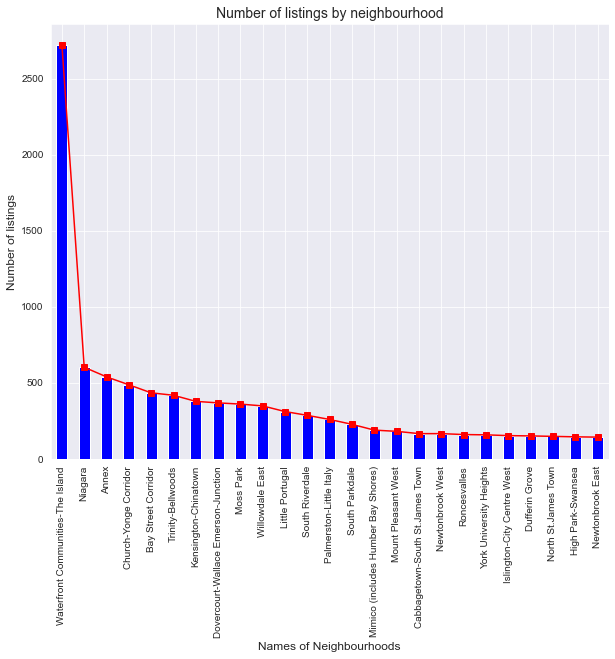

In [90]:
#Seeing which neighborhood has the highest number of listings
feq = df['neighbourhood'].value_counts().sort_values(ascending=False)[:25]
feq.plot.bar(figsize=(10,8), color ='b', width= 0.5)
plt.plot(feq,marker='s', c='red', ls='-')

plt.title('Number of listings by neighbourhood', fontsize=14)
plt.ylabel('Number of listings', fontsize = 12)
plt.xlabel('Names of Neighbourhoods', fontsize = 12)
plt.show()